In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('kaggle.csv')

In [3]:
data['gender'] = pd.to_numeric(data['gender'], errors='coerce').fillna(0).astype(int)

In [4]:
type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.1 MB


In [5]:
data.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585520,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,0.492635,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


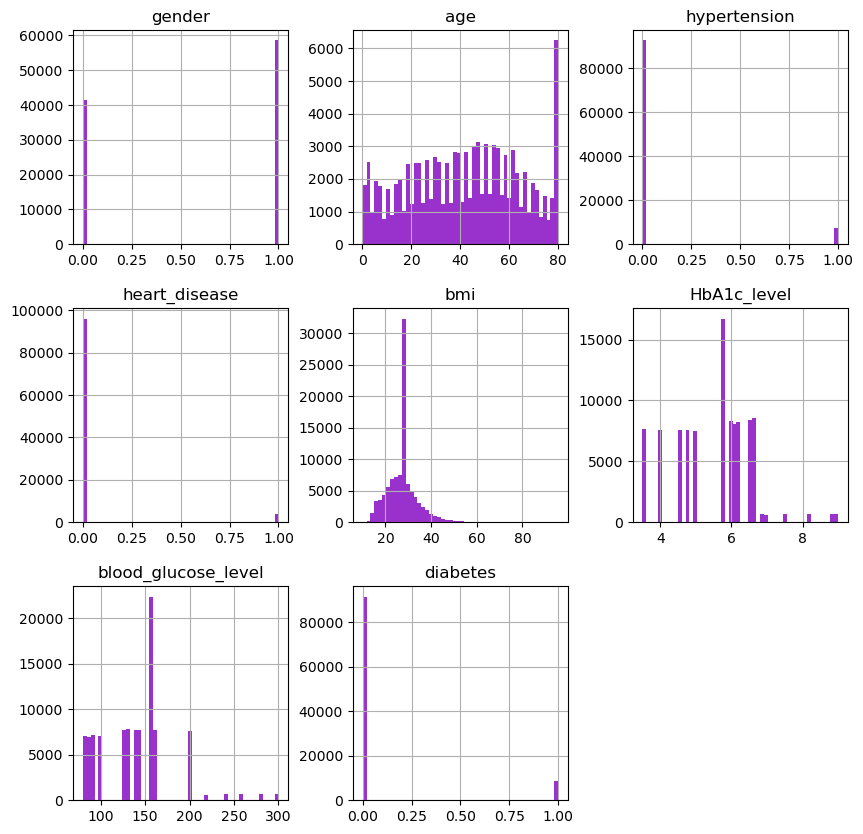

In [6]:
data.hist(bins=50, figsize=(10,10), color='darkorchid');

In [7]:
corr_matrix = data.corr(numeric_only=True).round(2)

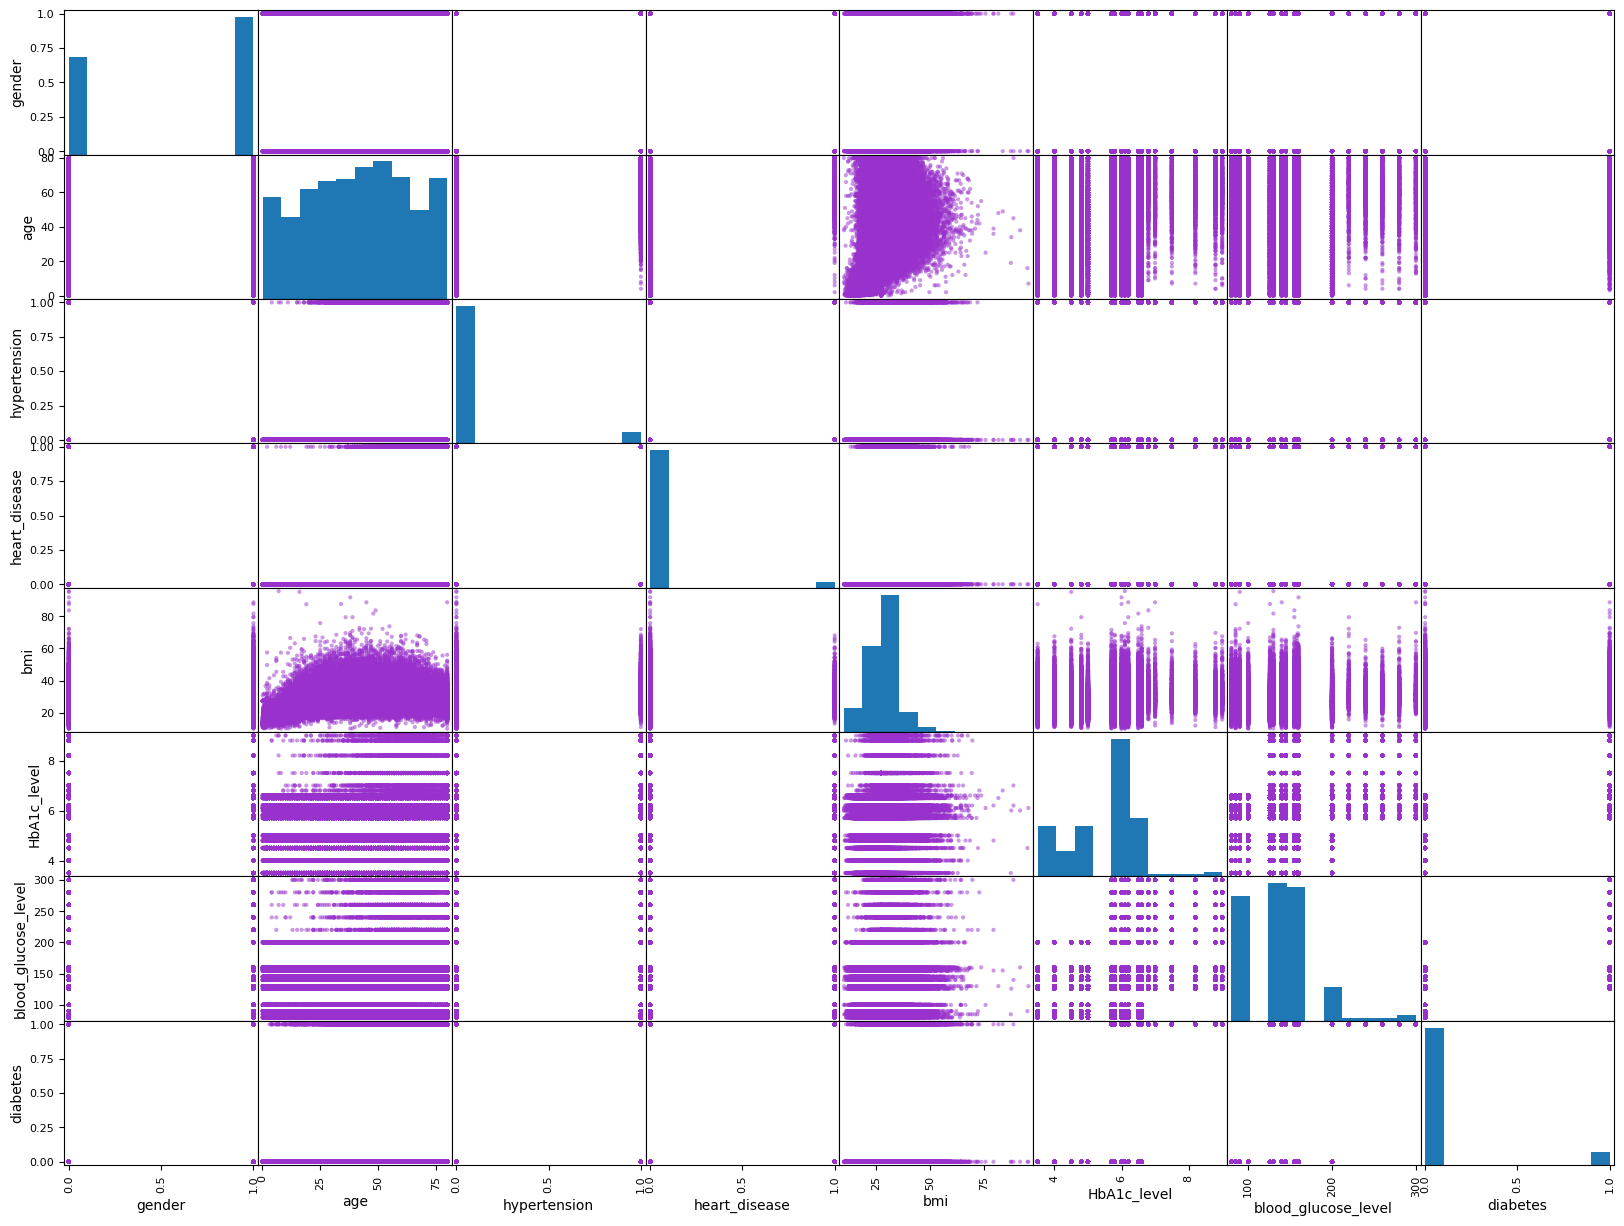

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (20,15), color = 'darkorchid');

In [9]:
from sklearn.model_selection import train_test_split
features = data[list(set(data.columns)-{'blood_glucose_level'})]

In [10]:
labels = data['blood_glucose_level']
features.columns

Index(['heart_disease', 'HbA1c_level', 'age', 'diabetes', 'gender', 'bmi',
       'hypertension'],
      dtype='object')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)
y_train.head()

60104    200
20476    140
67472    159
73299    158
31213    155
Name: blood_glucose_level, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
x = X_test.iloc[1:3]
y = y_test.iloc[1:3]

In [15]:
x

,heart_disease,HbA1c_level,age,diabetes,gender,bmi,hypertension
97971,0,4.0,33.0,0,0,27.32,0
3219,0,6.1,24.0,0,1,22.76,0


In [16]:
y

97971    158
3219     100
Name: blood_glucose_level, dtype: int64

In [17]:
lin_reg.predict(x)

array([133.17442974, 132.7204415 ])

In [18]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [19]:
y_train_pred = lin_reg.predict(X_train)

In [20]:
math.sqrt(mean_squared_error(y_train, y_train_pred))

36.94632529334917

###### Średni błąd 36 przy zakresie 50-250, nasz model jest okropny :3 , może las losowy będzie lepszy

In [21]:
from sklearn.ensemble import RandomForestRegressor
f_reg = RandomForestRegressor()
f_reg.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
scores = cross_val_score(f_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [23]:
rmse_scores

array([39.74184803, 39.22088848, 39.63957838, 38.96131121, 39.56950127,
       39.79820908, 39.39071142, 39.43520216, 39.75275142, 39.35851208])

In [24]:
rmse_scores.mean(), rmse_scores.std()

(39.486851352834286, 0.2526136427054894)

In [25]:
param_grid = [
    {'n_estimators' : [45, 50, 55], 'max_features' : [10, 11, 12, 13]}
]

In [26]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 11, 12, 13],
                          'n_estimators': [45, 50, 55]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [28]:
grid_search.best_params_

{'max_features': 13, 'n_estimators': 55}

In [29]:
np.sqrt(mean_squared_error(grid_search.best_estimator_.predict(X_test), y_test))

39.64433277668865

In [30]:
grid_search.best_estimator_.feature_importances_

array([0.01205539, 0.13934122, 0.20609672, 0.20545112, 0.03774032,
       0.38173999, 0.01757525])

In [31]:
feature_names = list(data.columns)

In [32]:
feature_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [33]:
importances = sorted(zip(grid_search.best_estimator_.feature_importances_, feature_names), reverse=True)

In [34]:
importance, feature = zip(*importances)

In [35]:
f_s = pd.Series(importance, index = feature)

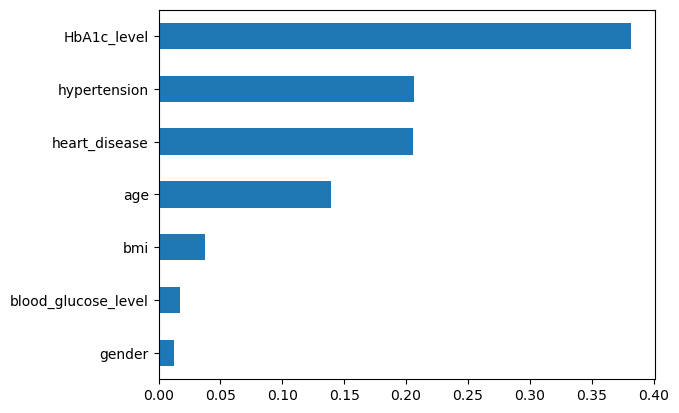

In [36]:
f_s.plot(kind = "barh")
plt.gca().invert_yaxis()